<a href="https://colab.research.google.com/github/PavanDaniele/child-mind-institute-problematic-internet-use-challenge/blob/main/ProjectDWM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obiettivo: prevedere il Severity Impairment Index (sii), che misura l'uso problematico di Internet, sulla base di dati tabulari e dati di accelerometro.

# ANALISI DATASET CHILD MIND INSTITUTE

## Pulizia dei dati

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix

Dopo aver importato le librerie necessarie, iniziamo caricando il csv del training per analizzarlo:

In [2]:
# URL raw dei file (l'URL RAW consente di accedere direttamente al contenuto del file senza passare dalla pagina GitHub)
train_url = "https://raw.githubusercontent.com/PavanDaniele/child-mind-institute-problematic-internet-use-challenge/main/train.csv"
test_url = "https://raw.githubusercontent.com/PavanDaniele/child-mind-institute-problematic-internet-use-challenge/main/test.csv"

# Carica direttamente da GitHub
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [4]:
train_df
# print(train_df.head()) # Stampa le prime righe

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [5]:
test_df

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sappiamo che il target 'sii' è ordinale (0: None, 1: Mild, 2: Moderate, 3: Severe). \
Notiamo che il training set contiene circa 3.9k osservazioni ed 82 feature eterogenee (numeriche, categoriche, booleane) e già da una prima esplorazione risulta evidente la presenza di un numero consistente di valori nulli, che potrebbero compromettere l'accuratezza della previsione della variabile target.

Per accertarcene individuiamo quali sono le colonne contenenti un gran numero di valori NaN (>50%) ed effettuaimo questa analisi su entrambi i set:

In [4]:
# Trovo le colonne con troppi (>50%) valori nulli
def count_cols_NaN(df, percentage):
  threshold = int(percentage * len(df)) # porta la soglia in numero
  null_counts = df.isnull().sum() # conta i NaN per colonna
  features = null_counts[null_counts > threshold].index.tolist() # filtra e tiene solo le colonne che superano la soglia (>50%) e prende le etichette di tali voci
  return features, len(features)

In [5]:
percentage = 0.5 # ovvero il 50%
null_features_train, num_null_features_train = count_cols_NaN(train_df, percentage)
print(f"In TRAIN:")
print(f"Numero di features con più del {percentage * 100} % di valori nulli: {num_null_features_train}\n")
print(f"Le colonne in questione sono:")
for f in null_features_train:
  print(f"   {f}: {train_df[f].isnull().sum()}")


null_features_test, num_null_features_test = count_cols_NaN(test_df, percentage)
print(f"\n\n In TEST:")
print(f"Numero di features con più del {percentage * 100} % di valori nulli: {num_null_features_test}\n")
print(f"Le colonne in questione sono:")
for f in null_features_test:
  print(f"   {f}: {test_df[f].isnull().sum()}")

In TRAIN:
Numero di features con più del 50.0 % di valori nulli: 13

Le colonne in questione sono:
   Physical-Waist_Circumference: 3062
   Fitness_Endurance-Season: 2652
   Fitness_Endurance-Max_Stage: 3217
   Fitness_Endurance-Time_Mins: 3220
   Fitness_Endurance-Time_Sec: 3220
   FGC-FGC_GSND: 2886
   FGC-FGC_GSND_Zone: 2898
   FGC-FGC_GSD: 2886
   FGC-FGC_GSD_Zone: 2897
   PAQ_A-Season: 3485
   PAQ_A-PAQ_A_Total: 3485
   PAQ_C-Season: 2239
   PAQ_C-PAQ_C_Total: 2239


 In TEST:
Numero di features con più del 50.0 % di valori nulli: 31

Le colonne in questione sono:
   CGAS-CGAS_Score: 12
   Physical-Waist_Circumference: 15
   Fitness_Endurance-Season: 16
   Fitness_Endurance-Max_Stage: 17
   Fitness_Endurance-Time_Mins: 17
   Fitness_Endurance-Time_Sec: 17
   FGC-FGC_GSND: 15
   FGC-FGC_GSND_Zone: 15
   FGC-FGC_GSD: 15
   FGC-FGC_GSD_Zone: 15
   BIA-Season: 12
   BIA-BIA_Activity_Level_num: 12
   BIA-BIA_BMC: 12
   BIA-BIA_BMI: 12
   BIA-BIA_BMR: 12
   BIA-BIA_DEE: 12
   BIA-BIA_EC

Concentriamoci prima sul training set.\
Data la considerevole dimensione del dataset e per evitare l'aumento del rumore dovuto a dati fuorvianti, ho deciso di eliminare le feature e le istanze contenenti un numero eccessivo di valori mancanti anziché procedere con tecniche di imputazione.

Creiamo quindi un nuovo dataframe eliminando tutte le colonne contenenti molti NaN:

In [6]:
# Rimuovo le colonne trovate precedentemente
new_train = train_df.drop(columns = null_features_train) # crea un nuovo dataframe elminando tutte le colonne elencate in null_features_train
new_train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


Il numero totale di colonne è 82. \
Guardiamo allora quante sono in totale le righe che hanno più di 40, 50, 60, 70 valori NaN:

In [7]:
def count_rows_over_nulls(df, thresholds=(40, 50, 60, 70), exclude=('id','sii')):
  X = df.drop(columns=[c for c in exclude if c in df.columns]) # tolgo 'id' e 'sii' dal conteggio
  nulls_per_row = X.isna().sum(axis=1) # NaN per riga (conteggio)
  counts = {}
  for t in thresholds:
    counts[t] = int((nulls_per_row >= t).sum()) # calcola quante righe hanno più di 't' NaN

  return counts, len(df) # dove len(df) è il numero totale di righe

In [8]:
# Eseguiamo la funzione per capire se anche alcune righe vanno eliminate
counts, n_rows = count_rows_over_nulls(train_df)
for t in sorted(counts):
  print(f"Righe con più di {t} valori NaN: {counts[t]} ({counts[t]/n_rows:.1%})")

Righe con più di 40 valori NaN: 1365 (34.5%)
Righe con più di 50 valori NaN: 1039 (26.2%)
Righe con più di 60 valori NaN: 799 (20.2%)
Righe con più di 70 valori NaN: 696 (17.6%)


Alcune righe hanno decisamente troppi valori nulli, pertanto decidiamo di usare 60 come soglia arbitraria e di eliminare le righe con più di 60 NaN.

In [9]:
# Quindi trovo le righe con troppi valori nulli
def count_rows_NaN(df, threshold=60):
  null_per_row = df.isnull().sum(axis=1)
  index = null_per_row[null_per_row > threshold].index.tolist()
  return index, len(index)

row_NaN = count_rows_NaN(train_df)
print(f"Numero di righe con più di 60 valori nulli: {row_NaN[1]}\n")

Numero di righe con più di 60 valori nulli: 799



Rimuoviamo quindi anche le righe con molti NaN dal dataframe precedentemente creato rimuovendo le colonne con molti NaN:

In [10]:
# Eliminiamo le righe trovate precedentemente
row_NaN_idx, row_NaN_count = count_rows_NaN(new_train, threshold=60)
new_train = new_train.drop(index = row_NaN_idx)

In [11]:
# Diamo un'occhiata al df finale
new_train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


Eliminiamo infine le righe con sii nullo:

In [12]:
new_train = new_train.dropna(subset=['sii']) # uso dropna perché rimuove le righe con NaN in sii in modo diretto
new_train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


Infine, imputiamo i valori nulli (moda per le categoriche, mediana per le numeriche) e codifichiamo le categoriche con un encoding ordinale (LabelEncoder):

In [13]:
# Sostituzione dei valori nulli rimanenti
def encoding(df):
  df = df.copy()
  for col in df.columns:
    # se la colonna è di tipo object(=categoriale), la riempiamo con la moda e la codifichiamo
    if df[col].dtype == 'object':
      df[col] = df[col].fillna(df[col].mode()[0]) # imputazione (moda)
      df[col] = LabelEncoder().fit_transform(df[col])# encoding ordinale
    else:
      # se la colonna è di tipo numerico, la riempiamo con la mediana
      df[col] = df[col].fillna(df[col].median()) # imputazione: scelto mediana rispetto a media perchè ha più robustezza agli outlier

  return df

In [14]:
# X: features, y: target
X = encoding(new_train.drop(columns=['id', 'sii']))
y = new_train['sii']

Disegnamo ora un grafico a barre per vedere lo sbilanciamento delle classi: per ogni valore della colonna sii in new_train mostra quante righe lo hanno (I valori NaN sono esclusi).

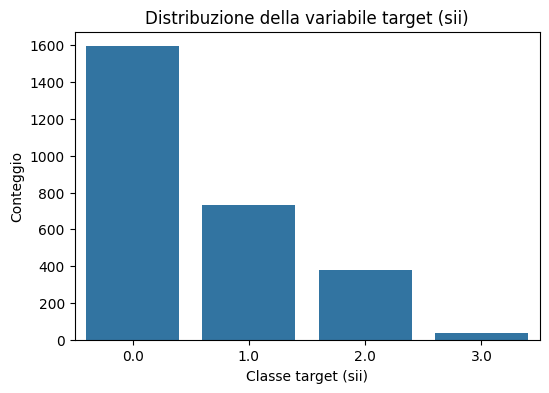

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sii', data=new_train)
plt.title('Distribuzione della variabile target (sii)')
plt.xlabel('Classe target (sii)')
plt.ylabel('Conteggio')
plt.show()

In [16]:
# Otteniamo le percentuali:
new_train['sii'].value_counts(normalize=True).sort_index().map(lambda x: f"{x:.1%}")

,proportion
sii,
0.0,58.3%
1.0,26.7%
2.0,13.8%
3.0,1.2%


La distribuzione del target è sbilanciata: classe 0=58.3%, 1=26.7%, 2=13.8%, 3=1.2% \
Si vede uno sbilanciamento marcato e le percentuali confermano che la classe 3 è molto rara., pertanto sarà necessario valutare l'utilizzo di _StratifiedKFold_ e metriche robuste.

Calcoliamo la matrice di correlazione di Pearson (solo tra colonne numeriche)
Ogni cella è in [-1, 1]:
  - +1 = correlazione lineare perfetta positiva
  - 0 = nessuna correlazione lineare
  - -1 = perfetta negativa

In [17]:
plt.figure(figsize=(14, 12))
corr_matrix = new_train.corr(numeric_only=True)

<Figure size 1400x1200 with 0 Axes>

E mostriamo la heatmap della matrice:
  - cmap='coolwarm': blu per negativi, rosso per positivi
  - center=0: il colore neutro è centrato sullo 0
  - annot=False: non scrive i numeri nelle celle (solo colore)

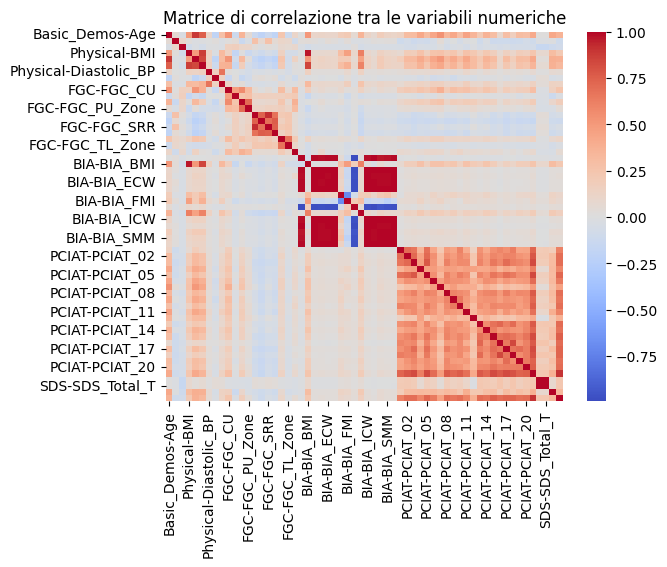

In [18]:
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Matrice di correlazione tra le variabili numeriche')
plt.show()

Si notano blocchi chiari:
  - un blocco grande, PCIAT-* (in basso a destra), con forti correlazioni positive: sono item della stessa scala.
  - un blocco nel mezzo con variabili BIA-* (composizione corporea) molto correlate tra loro. Alcune coppie mostrano correlazioni negative.
  - le altre variabili (es. Basic_Demos-Age, Physical-BMI, Physical-Diastolic_BP) hanno correlazioni deboli/moderate con il resto.

*Nota: Pearson è calcolata su coppie complete (solo righe dove entrambe le colonne non sono NaN). \
Implicazioni: la multicollinearità può essere problematica per modelli lineari. Con modelli ad alberi/boosting l'impatto è minore, ma la ridondanza può comunque aumentare la complessità.*

Calcoliamo la Pearson tra sii e le variabili PCIAT-*:

In [19]:
# Seleziona le colonne PCIAT + la colonna 'sii'
pciat_cols = [col for col in new_train.columns if col.startswith("PCIAT-")] # crea la lista di tutte le colonne i cui nomi iniziano con PCIAT-
pciat_df = new_train[pciat_cols + ['sii']] # costruisce un DataFrame con solo quelle colonne + il target sii

# Calcola la correlazione di Pearson tra tutte le colonne numeriche del sotto-DataFrame (quindi tra ogni item PCIAT e sii).
correlation_matrix = pciat_df.corr(numeric_only=True)

# Estrai solo la colonna delle correlazioni con 'sii', escludendo 'sii' stesso (ordina decrescente per vedere prima le feature più positivamente correlate al target)
sii_corr = correlation_matrix['sii'].drop('sii').sort_values(ascending=False) # rimuove l’auto-correlazione sii–sii (=1).

# Visualizza come tabella
sii_corr_df = sii_corr.reset_index().rename(columns={'index': 'Feature', 'sii': 'Correlazione'})
print(sii_corr_df)

              Feature  Correlazione
0   PCIAT-PCIAT_Total      0.899681
1      PCIAT-PCIAT_15      0.751399
2      PCIAT-PCIAT_18      0.731112
3      PCIAT-PCIAT_17      0.729867
4      PCIAT-PCIAT_05      0.722722
5      PCIAT-PCIAT_13      0.705679
6      PCIAT-PCIAT_20      0.703013
7      PCIAT-PCIAT_16      0.698566
8      PCIAT-PCIAT_08      0.695458
9      PCIAT-PCIAT_03      0.694736
10     PCIAT-PCIAT_02      0.694597
11     PCIAT-PCIAT_10      0.689972
12     PCIAT-PCIAT_19      0.683293
13     PCIAT-PCIAT_14      0.675953
14     PCIAT-PCIAT_09      0.660485
15     PCIAT-PCIAT_06      0.645596
16     PCIAT-PCIAT_01      0.617883
17     PCIAT-PCIAT_11      0.609964
18     PCIAT-PCIAT_04      0.589342
19     PCIAT-PCIAT_07      0.460864
20     PCIAT-PCIAT_12      0.370844


Otteniamo valori molto elevati: il totale PCIAT ha circa ρ=0.90 con sii, e molti item singoli hanno ρ tra 0.65-0.75.\
Questo indica una forte associazione lineare, gli item PCIAT misurano lo stesso costrutto del target risultando quindi estremamente predittivi.

Selezioniamo le top-5 feature più correlate con il target (in base alla Pearson precedente) e ne visualizziamo la distribuzione per classe di sii tramite boxplot.\
Questo serve a verificare visivamente:
  - se la relazione è monotona (le mediane crescono con sii),

il grado di separazione tra le classi (overlap fra IQR),

la presenza di outlier o code lunghe che potrebbero richiedere trasformazioni.
Un buon segnale è vedere le mediane spostarsi coerentemente verso l'alto al crescere di sii, in linea con le alte correlazioni stimate per le variabili PCIAT.

Nei boxplot ogni “scatola” mostra:
  - linea al centro = mediana (50° percentile)
  - box = IQR (dal 25° al 75° percentile)
  - "baffi" = coda dei dati, i puntini = outlier

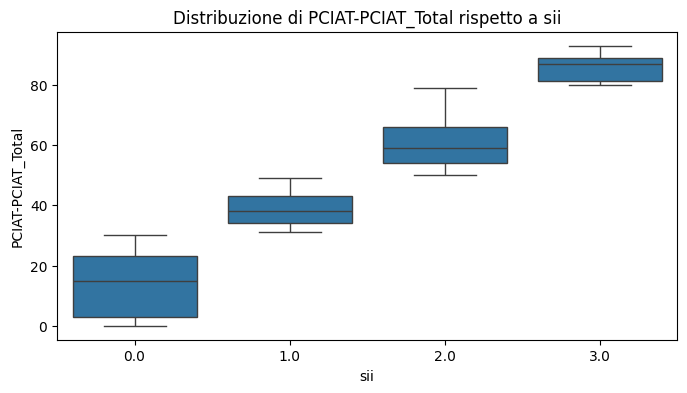

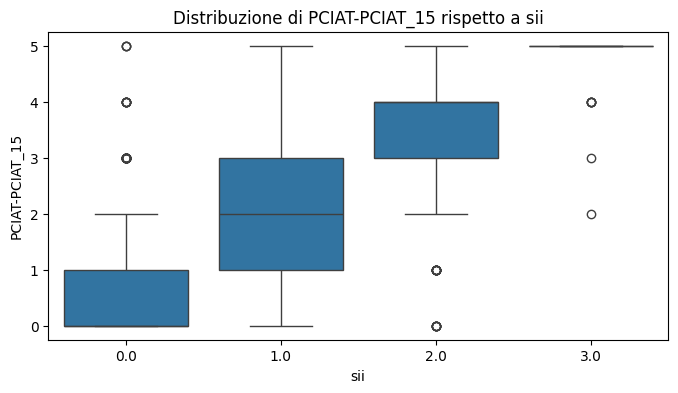

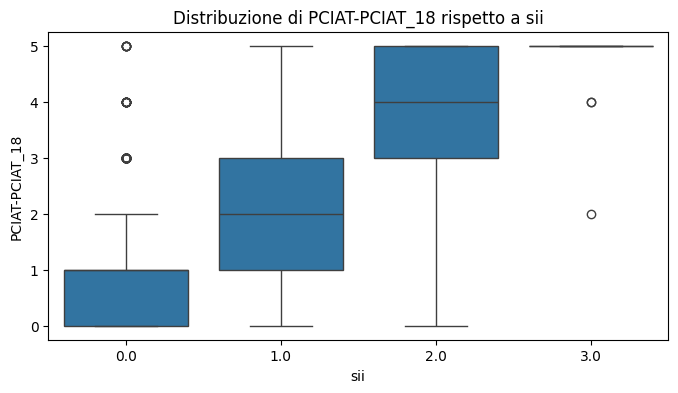

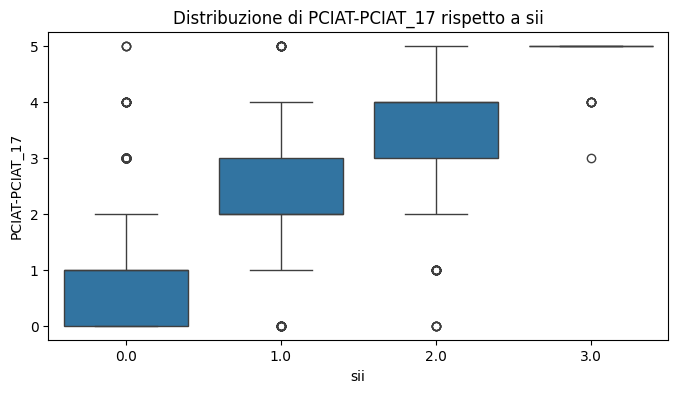

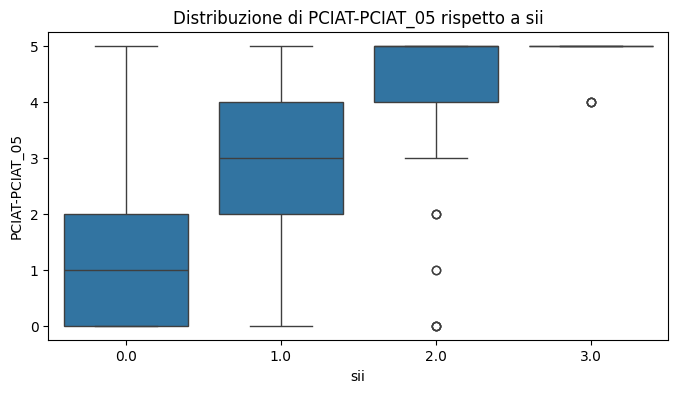

In [20]:
# Seleziona le top 5 feature più correlate con sii
top_features = sii_corr.head(5).index.tolist()

for feature in top_features:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x='sii', y=feature, data=new_train)
  plt.title(f'Distribuzione di {feature} rispetto a sii')
  plt.xlabel('sii')
  plt.ylabel(feature)
  plt.show()

In tutti i boxplot si osserva una relazione monotona: le mediane crescono al crescere di sii.\
La separazione tra classi è buona (anche se gli IQR si toccano un po’, le mediane sono ben distanti e i box si sovrappongono poco) soprattutto tra 0-1 e 1-2.
C'è più sovrapposizione tra 2 e 3, anche perché la classe 3 è rarissima (campione molto piccolo).\
Gli item PCIAT sono a scala discreta 0-5: si notano effetti ammucchiamento al massimo consentito (molti 5).\
Il comportamento è coerente con le alte correlazioni stimate in precedenza.

**Rimozione del blocco PCIAT:** \
Le feature PCIAT-* risultano fortemente correlate con il target (sii) ma non sono presenti nel set di test. Per evitare mismatch in futuro, le escludiamo dal modello:

In [21]:
# Eliminiamo le colonne PCIAT
X = X.drop(columns=[col for col in X.columns if col.startswith("PCIAT-")], errors='ignore')

**Riduzione del blocco BIA:**
Le variabili BIA-* mostrano forte collinearità, manteniamo quindi solo un sottoinsieme rappresentativo (bia_selected) e rimuoviamo le restanti BIA "ridondanti", così da ridurre dimensionalità, collinearità e problemi di NaN:

In [22]:
# Filtraggio delle variabili BIA selezionate
bia_selected = ['BIA-BIA_BMI', 'BIA-BIA_FFM', 'BIA-BIA_Fat', 'BIA-BIA_SMM', 'BIA-BIA_DEE', 'BIA-BIA_TBW', 'BIA-BIA_Activity_Level_num']

In [23]:
all_bia = [col for col in new_train.columns if col.startswith("BIA-")]
bia_ridondanti = list(set(all_bia) - set(bia_selected))
X = X.drop(columns=bia_ridondanti, errors='ignore')

print(f"Colonne BIA rimosse: {bia_ridondanti}")

Colonne BIA rimosse: ['BIA-BIA_BMR', 'BIA-BIA_ECW', 'BIA-BIA_BMC', 'BIA-BIA_FMI', 'BIA-Season', 'BIA-BIA_LST', 'BIA-BIA_LDM', 'BIA-BIA_Frame_num', 'BIA-BIA_FFMI', 'BIA-BIA_ICW']


La gestione dei valori mancanti è cruciale per mantenere l'integrità dei dati. Alcune possibili
 strategie includono:
 Possibilità 1: Utilizzo di Random Forest per predire i valori mancanti.
 Possibilità 2: Rimpiazzare con la media (nel caso di regressione) o moda (nel caso di classificazione).
 Possibilità 3: Aggiungere una feature binaria che indica se l’elemento è mancante o no. Questa
 soluzione può fornire informazioni aggiuntive sui dati in certi contesti.
 Possibilità 4: Eliminare l’istanza con valori mancanti, con il rischio di perdere informazioni.
 Possibilità 5: Eliminare l’intera colonna della feature con valori mancanti, con il rischio di perdere
 informazioni

**Encoding**
L'Encoding è la trasformazione delle feature categoriche in numeriche, affinché i modelli di ML possano "accettarle".

## Random Forest

Splittiamo con uno stratified sampling, suddividendo i dati in train/validation (80% train e 20% val) mantenendo le proporzioni del rapporto tra classi di y.

In [24]:
# Divisione del dataset in training e validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Distribuzione complessiva:\n", y.value_counts(normalize=True))
print("Train:\n", y_train.value_counts(normalize=True))
print("Val:\n", y_val.value_counts(normalize=True))

Distribuzione complessiva:
 sii
0.0    0.582602
1.0    0.266813
2.0    0.138158
3.0    0.012427
Name: proportion, dtype: float64
Train:
 sii
0.0    0.582724
1.0    0.266910
2.0    0.138026
3.0    0.012340
Name: proportion, dtype: float64
Val:
 sii
0.0    0.582117
1.0    0.266423
2.0    0.138686
3.0    0.012774
Name: proportion, dtype: float64


Perfetto, le proporzioni di sii sono praticamente identiche tra dataset completo, train e validation. Le minime differenze (nell'ordine di 0.0-0.05 punti percentuali) sono dovute all'arrotondamento e ai vincoli interi sul numero di campioni.\
Questo conferma che lo split stratificato ha funzionato correttamente e che lo sbilanciamento del target viene mantenuto in entrambi i set

Alleniamo una Random Forest come modello di riferimento iniziale (parametri default) per avere un primo riferimento di performance:

In [25]:
# Addestriamo il modello Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Calcoliamo precision, recall e F1 per ciascuna classe, oltre a *macro* e *weighted average*.\
Con target sbilanciato guardiamo soprattutto macro-F1 (tutte le classi pesate uguale) e balanced accuracy

In [26]:
# Predizione sul validation set
y_pred = rf_model.predict(X_val)

# Report di classificazione
report = classification_report(y_val, y_pred, output_dict=True)

# Visualizzazione
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision    recall  f1-score     support
0.0            0.677725  0.896552  0.771930  319.000000
1.0            0.478723  0.308219  0.375000  146.000000
2.0            0.419355  0.171053  0.242991   76.000000
3.0            0.000000  0.000000  0.000000    7.000000
accuracy       0.627737  0.627737  0.627737    0.627737
macro avg      0.393951  0.343956  0.347480  548.000000
weighted avg   0.580217  0.627737  0.582962  548.000000


L'accuratezza è 0.628, ma il modello sta quasi solo riconoscendo la classe 0. \
Le classi 1-2 hanno recall basso e la 3 non viene mai predetta (precision/recall/F1 = 0). \
La macro-F1 = 0.347 (tutte le classi pesate uguale) è molto più bassa della weighted-F1 = 0.583, segno che le classi minoritarie sono trascurate.

Per-classe:
- *Classe 0 (support 319):* precision 0.678, recall 0.897, F1 0.772 --> il modello "prende" quasi tutti gli 0 (alto recall), ma confonde parecchi non-0 come 0 (precision non altissima).
- *Classe 1 (146):* precision 0.479, recall 0.308, F1 0.375 --> molte istanze di 1 vengono sbagliate.
- *Classe 2 (76):* precision 0.419, recall 0.171, F1 0.243 --> molto difficile da catturare.
- *Classe 3 (7):* 0/0/0 --> il modello non predice mai la classe 3 (tipico con classi rarissime).

**Importanza delle feature (Random Forest, impurity/Gini):** \
Mostriamo le top-20: il valore indica quanta *riduzione media dell'impurità* la feature apporta negli alberi (le importanze sommano a 1):

In [27]:
rf_importances = rf_model.feature_importances_
features = X.columns

# Selezioniamo le 20 feature più importanti
top_rf = pd.Series(rf_importances, index=features).sort_values(ascending=False)[:20]

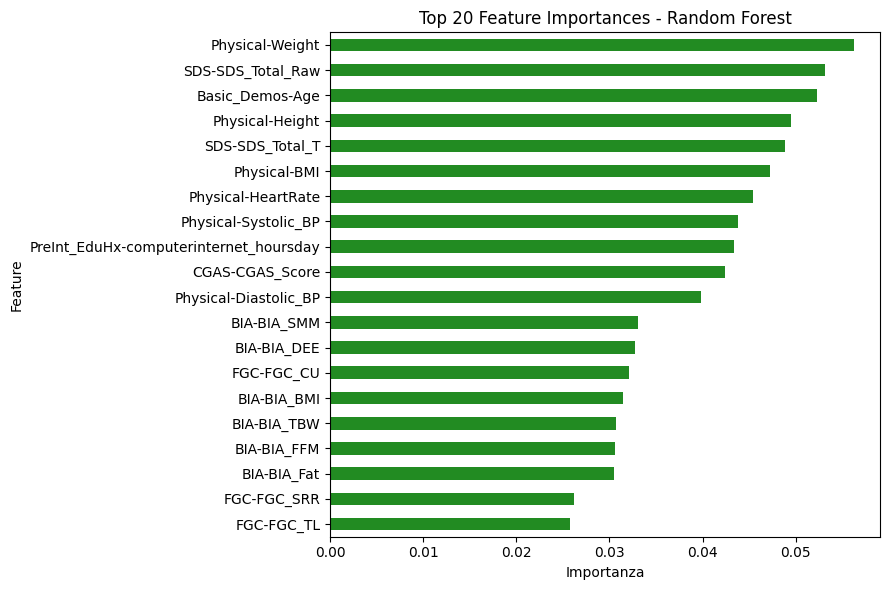

In [28]:
# Grafico
plt.figure(figsize=(9, 6))
top_rf.plot(kind='barh', color='forestgreen')
plt.title("Top 20 Feature Importances - Random Forest")
plt.xlabel("Importanza")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Spiccano variabili fisiche (**Physical-Weight/Height/BMI/HeartRate/BP**), punteggi **SDS** e alcune **BIA**. \
Nessuna feature domina (valori da 0.03 a 0.06).

**Cross-Validation** \
Valutiamo la Random Forest con 5-fold CV usando accuracy come metrica:

In [29]:
# Definiamo la metrica di valutazione
scoring = make_scorer(accuracy_score)

# Eseguiamo la cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=cv, scoring=scoring)

# Visualizziamo i risultati della cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation scores: [0.60218978 0.61608775 0.57038391 0.58866545 0.58500914]
Mean accuracy: 0.5925 ± 0.0156


KFold non è stratificato: con un target sbilanciato i fold possono avere proporzioni di classe diverse, quindi la stima è meno stabile/affidabile (può risultare più alta o più bassa a seconda di come cadono le classi). \
Per coerenza su dataset sbilanciati, è preferibile usare StratifiedKFold e valutare anche metriche robuste alle classi sbilanciate (es. macro-F1, balanced accuracy).

Ripetiamo quindi la CV con fold stratificati, più corretti su dataset sbilanciati. \
Manteniamo l'accuracy per confronto, ma nelle analisi successive useremo anche macro-F1 e balanced accuracy:

In [30]:
# kfold stratificato
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=cv, scoring=scoring)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation scores: [0.60583942 0.59780622 0.60146252 0.58683729 0.59232176]
Mean accuracy: 0.5969 ± 0.0067


Con fold stratificati l'accuracy media passa a 0.5969 e la variabilità tra i fold si riduce (0.0067 vs 0.0156). \
Questo conferma che la CV stratificata è più stabile/corretta su target sbilanciati.

**Matrice di confusione (validation)**\
Disegnamo la matrice di confusione. La diagonale sono le predizioni corrette mentre gli elementi fuori diagonale sono gli errori. \
Con il nostro dataset sbilanciato ci aspettiamo molte predizioni sulla classe 0 e poche/nessuna sulla classe 3.

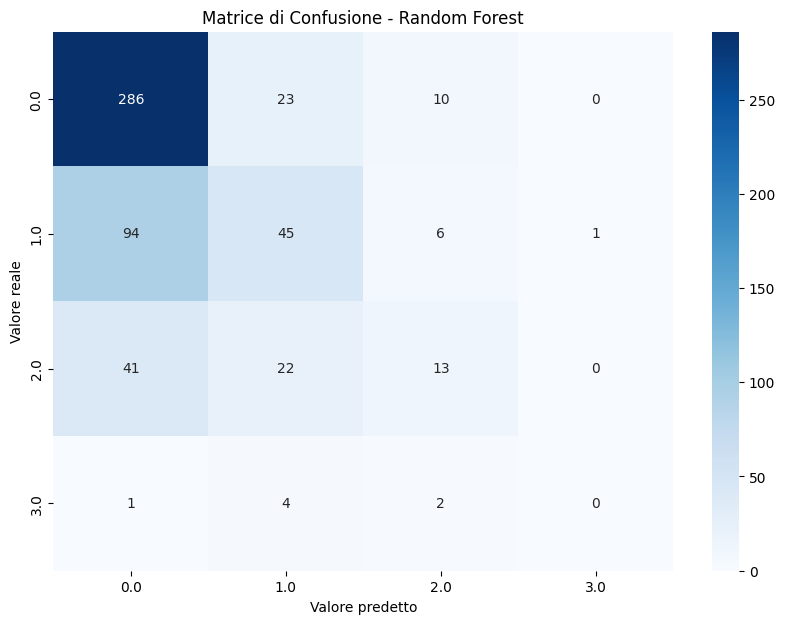

In [31]:
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Matrice di Confusione - Random Forest')
plt.xlabel('Valore predetto')
plt.ylabel('Valore reale')
plt.show()

In [50]:
cm = conf_matrix.copy() # copia la matrice (che ha shape (K,K): righe=veri, colonne=predetti)
labels = sorted(np.unique(y)) # ordina le etichette di classe presenti

# support per classe (somma riga): axis=1 somma per riga (quindi per classe
row_sum = cm.sum(axis=1) # shape (K,)

# recall per classe (diagonale / support)
recall  = np.diag(cm) / row_sum # shape (K,)
recall

array([0.89655172, 0.30821918, 0.17105263, 0.        ])

quindi recall di:
-  0.897 per la classe 0
-  0.308 per la classe 1
-  0.171 per la classe 2
-  0.0 per la classe 3

In [49]:
# esempi usati nel commento:
perc_class0 = (cm[0,1] + cm[0,2]) / row_sum[0]   # % della classe 0 predetta 1 o 2
perc_class1 =  cm[1,0] / row_sum[1]              # % della classe 1 predetta 0
perc_class2 =  cm[2,0] / row_sum[2]              # % della classe 2 predetta 0

print(f"Recall classe 0: {recall[0]:.1f}")
print(f"% classe 0: {perc_class0:.1%}")
print(f"% classe 1: {perc_class1:.1%}")
print(f"% classe 2: {perc_class2:.1%}")

Recall classe 0: 0.9
% classe 0: 10.3%
% classe 1: 64.4%
% classe 2: 53.9%


Notiamo ancora una volta che il modello è fortemente sbilanciato verso la classe 0:
  - _Classe 0 (veri 319):_ corretti 286 --> recall 0.897. Il 10.3% va in 1 o 2 (23 e 10 casi)
  - _Classe 1 (veri 146):_ corretti 45 --> recall 0.308. Il 64.4% (94 casi) viene predetto come 0
  - _Classe 2 (veri 76):_ corretti 13 --> recall 0.171. Il 53.9% (41 casi) va in 0, 28.9% (22) in 1
  - _Classe 3 (veri 7):_ 0 corretti --> recall 0.00. Il modello la confonde con 1 (4), 2 (2), 0 (1)

Distribuzione delle predizioni:
  - classe 0 = 422/548 (77%)
  - classe 1 = 94/548 (17.2%)
  - classe 2 = 31/548 (5.7%)
  - classe 3 = 1/548 (0.2%)
Il classificatore tende a scegliere 0 quasi ovunque.